In [349]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
# !pip install sklearn
# from sklearn.model_selection import test_train_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn import linear_model

# !pip install xgboost
import xgboost
from xgboost import plot_importance

import geopandas
from shapely.geometry import Point, Polygon

In [174]:
df_listings = pd.read_csv('listings.csv')#, low_memory=False)
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20190808195507,2019-08-09,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",From week 38 to week 47 maintenance work to th...,The neighbourhood is well served by 24 hours p...,NaN,NaN,Please: - Leave your shoes in the entrance - ...,NaN,NaN,https://a0.muscache.com/im/pictures/10272854/8...,NaN,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",within an hour,100%,NaN,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Amsterdam, North Holland, Netherlands",Indische Buurt,Oostelijk Havengebied - Indische Buurt,NaN,Amsterdam,North Holland,NaN,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.36575,4.94142,f,Apartment,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",NaN,$59.00,NaN,"$1,500.00",$200.00,$60.00,1,$20.00,3,15,3,3,15,15,3.0,15.0,today,t,8,18,43,89,2019-08-09,267,30,2009-03-30,2019-08-05,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.12
1,20168,https://www.airbnb.com/rooms/20168,20190808195507,2019-08-09,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,Check-in time from 2pm till 10pm (But it doesn...,No need to use any transport! All is within a ...,NaN,"No curfew, free entrance 27/7 with your own ke...",This studio/room takes entire floor and has it...,NaN,NaN,https://a0.muscache.com/im/pictures/69979664/3...,NaN,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",Secondary phone nr. + (Phone number hidden by ...,within an hour,100%,NaN,f,https://a0.muscach

In [175]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20677 entries, 0 to 20676
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 16.7+ MB


In [176]:
df_listings.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.067700e+04,2.067700e+04,0.0,0.0,0.0,2.067700e+04,0.0,20665.000000,20665.000000,0.0,20677.000000,20677.000000,20677.000000,20671.000000,20669.000000,20669.000000,386.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,17861.00000,17850.000000,17852.000000,17840.000000,17847.000000,17842.000000,17842.000000,20677.000000,20677.000000,20677.000000,20677.000000,18084.000000
mean,1.791013e+07,2.019081e+13,NaN,NaN,NaN,5.666981e+07,NaN,7.010888,7.010888,NaN,52.365278,4.889565,2.879335,1.158580,1.454400,1.829213,548.435233,1.459351,3.546694,617.663297,3.516371,3.838129,602.894472,611.190937,3.653485,606.781022,3.783479,7.686173,12.423321,54.104609,23.290323,6.998597,94.97962,9.687283,9.469079,9.735762,9.789488,9.476124,9.177054,4.925134,4.492431,0.410988,0.021715,0.987736
std,1.041987e+07,7.800970e+00,NaN,NaN,NaN,6.812902e+07,NaN,37.729548,37.729548,NaN,0.016353,0.035970,1.314935,0.380091,0.894856,1.407580,555.655913,0.935662,18.690394,537.978553,18.688704,18.874855,538.915327,537.842556,18.759495,536.703416,7.219078,14.491902,22.936166,99.488601,48.619730,14.239550,6.63050,0.693180,0.867372,0.654358,0.610074,0.707655,0.808275,22.883678,22.710906,1.082794,0.237805,1.349155
min,2.818000e+03,2.019081e+13,NaN,NaN,NaN,3.159000e+03,NaN,0.000000,0.000000,NaN,52.289270,4.753120,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,9.340207e+06,2.019081e+13,NaN,NaN,NaN,8.795077e+06,NaN,1.000000,1.000000,NaN,52.355130,4.863870,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,21.000000,2.000000,2.000000,20.000000,21.000000,2.000000,21.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,93.00000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.240000
50%,1.774427e+07,2.019081e+13,NaN,NaN,NaN,2.618942e+07,NaN,1.000000,1.000000,NaN,52.364620,4.887030,2.000000,1.000000,1.000000,1.000000,484.000000,1.000000,2.000000,1125.000000,2.000000,3.000000,1124.000000,1124.000000,2.300000,1124.000000,0.000000,0.000000,0.000000,1.000000,9.000000,2.000000,97.00000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.540000
75%,2.601974e+07,2.019081e+13,NaN,NaN,NaN,7.754037e+07,NaN,2.000000,2.000000,NaN,52.375190,4.909260,4.000000,1.000000,2.000000,2.000000,861.000000,2.000000,3.000000,1125.000000,3.000000,4.000000,1125.000000,1125.000000,3.000000,1125.000000,4.000000,8.000000,13.000000,50.000000,23.000000,7.000000,100.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,0.000000,1.070000
max,3.759099e+07,2.019081e+13,NaN,NaN,NaN,2.839422e+08,NaN,980.000000,980.000000,NaN,52.424710,5.027690,30.000000,15.000000,12.000000,32.000000,3229.000000,16.000000,1001.000000,1825.000000,1001.00

In [177]:
# sns.pairplot(df_listings)
df_listings.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
summary                                          object
space                                            object
description                                      object
experiences_offered                              object
neighborhood_overview                            object
notes                                            object
transit                                          object
access                                           object
interaction                                      object
house_rules                                      object
thumbnail_url                                   float64
medium_url                                      float64
picture_url                                     

In [178]:
# df_listings[['thumbnail_url','medium_url','xl_picture_url']] = 
# df_listings[['thumbnail_url','medium_url','xl_picture_url']].apply(str)
# df_listings.thumbnail_url.unique()
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20190808195507,2019-08-09,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",From week 38 to week 47 maintenance work to th...,The neighbourhood is well served by 24 hours p...,NaN,NaN,Please: - Leave your shoes in the entrance - ...,NaN,NaN,https://a0.muscache.com/im/pictures/10272854/8...,NaN,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",within an hour,100%,NaN,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Amsterdam, North Holland, Netherlands",Indische Buurt,Oostelijk Havengebied - Indische Buurt,NaN,Amsterdam,North Holland,NaN,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.36575,4.94142,f,Apartment,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",NaN,$59.00,NaN,"$1,500.00",$200.00,$60.00,1,$20.00,3,15,3,3,15,15,3.0,15.0,today,t,8,18,43,89,2019-08-09,267,30,2009-03-30,2019-08-05,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.12
1,20168,https://www.airbnb.com/rooms/20168,20190808195507,2019-08-09,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,Check-in time from 2pm till 10pm (But it doesn...,No need to use any transport! All is within a ...,NaN,"No curfew, free entrance 27/7 with your own ke...",This studio/room takes entire floor and has it...,NaN,NaN,https://a0.muscache.com/im/pictures/69979664/3...,NaN,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",Secondary phone nr. + (Phone number hidden by ...,within an hour,100%,NaN,f,https://a0.muscach

In [179]:
# Removing unneccessary columns like URLs, free texts, and IDs (non primary) that are not related to 
# predcting prices or availability
dead_cols = ['listing_url','scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'neighborhood_overview','notes','transit', 'access', 'interaction','house_rules','thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications']
df_listings = df_listings.drop(dead_cols, axis=1)
df_listings.set_index('id', inplace=True)

In [180]:
# df_listings.thumbnail_url  = df_listings.thumbnail_url.astype(str)
# df_listings.medium_url     = df_listings.medium_url.astype(str)
# df_listings.xl_picture_url = df_listings.xl_picture_url.astype(str)

# df_listings.neighbourhood_group_cleansed = df_listings.neighbourhood_group_cleansed.astype(str)
# df_listings.host_acceptance_rate         = df_listings.host_acceptance_rate.astype(str)
df_listings.head()

,experiences_offered,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2818,none,Daniel,2008-09-24,within an hour,100%,NaN,t,1.0,1.0,t,f,"Amsterdam, North Holland, Netherlands",Indische Buurt,Oostelijk Havengebied - Indische Buurt,NaN,Amsterdam,North Holland,NaN,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.36575,4.94142,f,Apartment,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",NaN,$59.00,NaN,"$1,500.00",$200.00,$60.00,1,$20.00,3,15,3,3,15,15,3.0,15.0,today,t,8,18,43,89,2019-08-09,267,30,2009-03-30,2019-08-05,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.12
20168,none,Alexander,2009-12-02,within an hour,100%,NaN,f,2.0,2.0,t,f,"Amsterdam, North Holland, Netherlands",Grachtengordel,Centrum-Oost,NaN,Amsterdam,North Holland,1017,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.36509,4.89354,t,Townhouse,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Paid parking off premises"",...",NaN,$80.00,NaN,NaN,NaN,NaN,2,$0.00,1,1000,1,4,1000,1000,3.4,1000.0,today,t,0,8,34,124,2019-08-09,283,67,2010-03-02,2019-07-26,88.0,9.0,10.0,10.0,10.0,10.0,9.0,f,NaN,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",f,f,strict_14_with_grace_period,f,f,2,0,2,0,2.46
25428,none,Joan,2009-11-20,within an hour,100%,NaN,f,2.0,2.0,t,f,"Amsterdam, North Holland, Netherlands",Grachtengordel,Centrum-West,NaN,Amsterdam,North Holland,1016,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.37297,4.88339,f,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Elevator,...",NaN,$125.00,$650.00,"$2,000.00",$300.00,$40.00,2,$10.00,14,60,14,14,60,60,14.0,60.0,today,t,4,6,16,75,2019-08-09,3,2,2018-01-21,2019-05-11,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.16
27886,none,Flip,2010-03-23,within an hour,100%,NaN,t,1.0,1.0,t,t,"Amsterdam, North Holland, Netherlands",Westelijke Eilanden,Centrum-West,NaN,Amsterdam,North Holland,1013,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.38673,4.89208,t,Houseboat,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Breakfast,Heating,""Smoke det...",NaN,$150.00,$810.00,"$2,500.00",$0.00,$0.00,1,$0.00,2,730,2,2,730,730,2.0,730.0,today,t,6,13,26,66,2019-08-09,195,41,2012-01-09,2019-07-01,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",t,f,strict_14_with_grace_peri

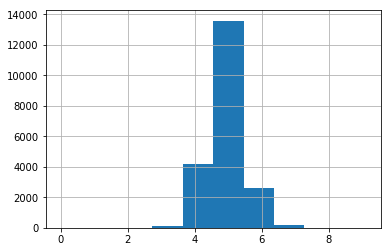

In [309]:
df_listings.log_price.hist()

In [308]:
df_listings['log_price'] = np.log1p(df_listings['price'])

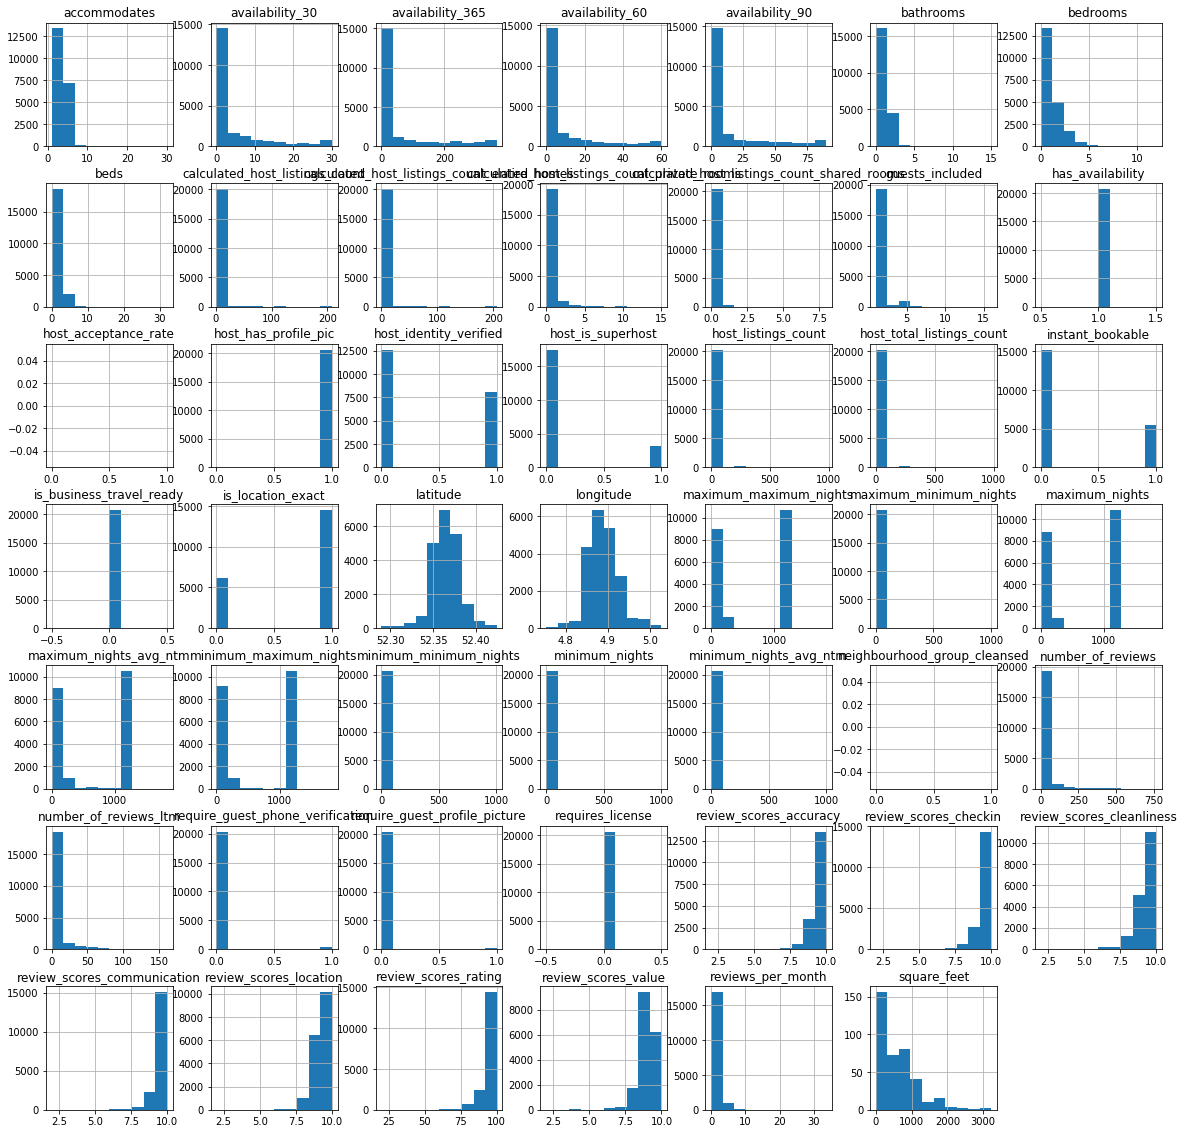

In [181]:
# sns.pairplot(df_listings)
df_listings.replace({'f': 0, 't':1}, inplace=True)

df_listings.hist(figsize=(20,20));

In [182]:
# Dropping single categorical or empty variables
df_listings.drop(['has_availability','host_acceptance_rate','host_has_profile_pic','is_business_travel_ready','maximum_maximum_nights','maximum_minimum_nights','minimum_maximum_nights','minimum_minimum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','neighbourhood_group_cleansed','require_guest_phone_verification', 'require_guest_profile_picture', 'requires_license'], axis=1, inplace=True)

In [183]:
# df_listings.host_has_profile_pic.value_counts()

In [297]:
df_listings.columns

Index(['experiences_offered', 'host_name', 'host_since', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       're

In [298]:
df_listings.describe()

,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,square_feet,price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_year,log_price
count,20665.000000,20665.000000,20665.000000,20665.000000,20677.000000,20677.000000,20677.00000,20677.000000,20671.000000,20669.000000,20669.000000,386.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,17861.00000,17850.000000,17852.000000,17840.000000,17847.000000,17842.000000,17842.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,18084.000000,20677.000000,20677.000000
mean,0.155529,7.010888,7.010888,0.390177,52.365278,4.889565,0.69986,2.879335,1.158580,1.454400,1.829213,548.435233,159.078686,1.459351,3.546694,617.663297,3.783479,7.686173,12.423321,54.104609,23.290323,6.998597,94.97962,9.687283,9.469079,9.735762,9.789488,9.476124,9.177054,0.263626,4.925134,4.492431,0.410988,0.021715,0.987736,2014.695362,4.920900
std,0.362417,37.729548,37.729548,0.487802,0.016353,0.035970,0.45833,1.314935,0.380091,0.894856,1.407580,555.655913,162.464267,0.935662,18.690394,537.978553,7.219078,14.491902,22.936166,99.488601,48.619730,14.239550,6.63050,0.693180,0.867372,0.654358,0.610074,0.707655,0.808275,0.440610,22.883678,22.710906,1.082794,0.237805,1.349155,1.995789,0.513980
min,0.000000,0.000000,0.000000,0.000000,52.289270,4.753120,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000,2008.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,52.355130,4.863870,0.00000,2.000000,1.000000,1.000000,1.000000,0.000000,99.000000,1.000000,2.000000,21.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,93.00000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.240000,2013.000000,4.605170
50%,0.000000,1.000000,1.000000,0.000000,52.364620,4.887030,1.00000,2.000000,1.000000,1.000000,1.000000,484.000000,130.000000,1.000000,2.000000,1125.000000,0.000000,0.000000,0.000000,1.000000,9.000000,2.000000,97.00000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.540000,2015.000000,4.875197
75%,0.000000,2.000000,2.000000,1.000000,52.375190,4.909260,1.00000,4.000000,1.000000,2.000000,2.000000,861.000000,180.000000,2.000000,3.000000,1125.000000,4.000000,8.000000,13.000000,50.000000,23.000000,7.000000,100.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.070000,2016.000000,5.198497
max,1.000000,980.000000,980.000000,1.000000,52.424710,5.027690,1.00000,30.000000,15.000000,12.000000,32.000000,3229.000000,8915.000000,16.000000,1001.000000,1825.000000,30.000000,60.000000,90.000000,365.000000,767.000000,161.000000,100.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,208.000000,206.000000,15.000000,8.000000,33.670000,2019.000000,9.095603


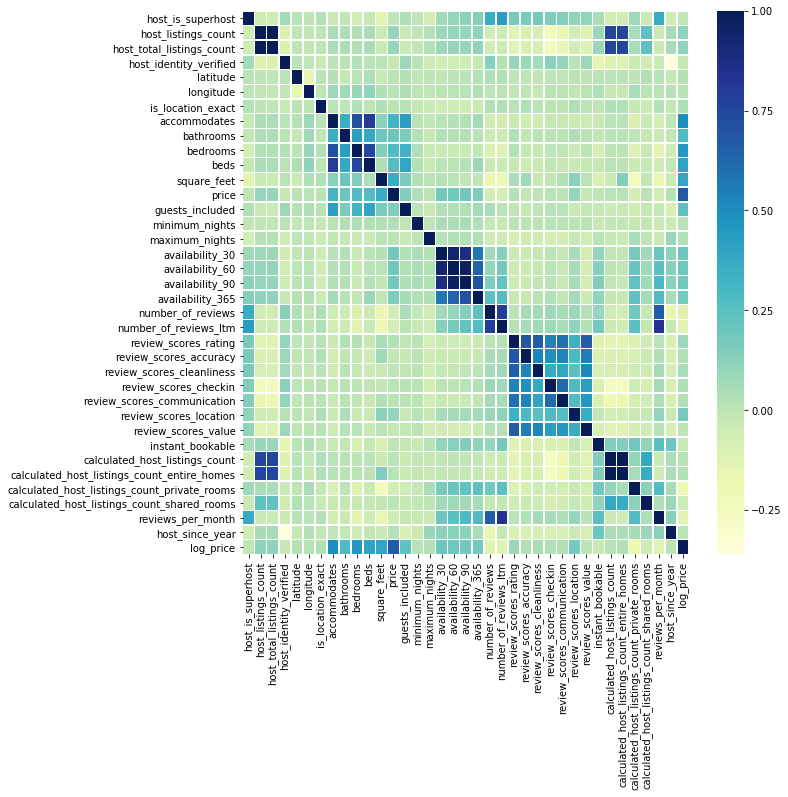

In [299]:
# sns.pairplot(df_listings)
corr = df_listings.corr()
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, 
        linewidths=.5,
        cmap="YlGnBu",
        ax=ax)

In [187]:
# df_listings.host_since.unique()

df_listings.host_since = pd.to_datetime(df_listings.host_since) 

In [188]:
df_listings['host_since_year'] = df_listings.host_since.dt.to_period('Y')

In [189]:
df_listings['host_since'].min()
df_listings['host_since_year'] = df_listings['host_since_year'].fillna(2008)

In [190]:
df_listings.iloc[0]

experiences_offered                                                                          none
host_name                                                                                  Daniel
host_since                                                                    2008-09-24 00:00:00
host_response_time                                                                 within an hour
host_response_rate                                                                           100%
host_is_superhost                                                                               1
host_listings_count                                                                             1
host_total_listings_count                                                                       1
host_identity_verified                                                                          0
street                                                      Amsterdam, North Holland, Netherlands
neighbourhood       

In [191]:
df_listings.host_since_year = df_listings.host_since_year.astype(str)
df_listings.host_since_year = df_listings.host_since_year.astype(int)
# df_listings['host_since_year'] = pd.to_numeric(df_listings['host_since_year'])

In [192]:
# df_max_yearwise_reviews.reset_index().head()

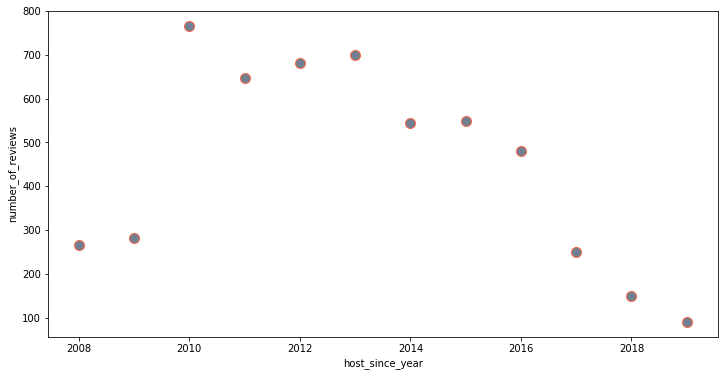

In [228]:
fig, ax = plt.subplots(figsize=(12,6))

df_max_yearwise_reviews = pd.DataFrame(df_listings.groupby('host_since_year')['number_of_reviews'].max())
df_max_yearwise_reviews.reset_index().plot.scatter(x='host_since_year', y='number_of_reviews', s=100, ax=ax, c='#708090', linewidths = 1, edgecolors='#FF6347')
# .plot.scatter(x='host_since_year', y='number_of_reviews', ax=ax)

In [244]:
# fig, ax = plt.subplots(figsize=(10,10))

# # df_listings.plot(x ='neighbourhood', kind = 'bar', ax=ax)
# df_listings.plot.scatter(x='host_since_year', y='number_of_reviews', ax=ax);
df_listings.room_type.value_counts()

Entire home/apt    16402
Private room        4194
Shared room           81
Name: room_type, dtype: int64

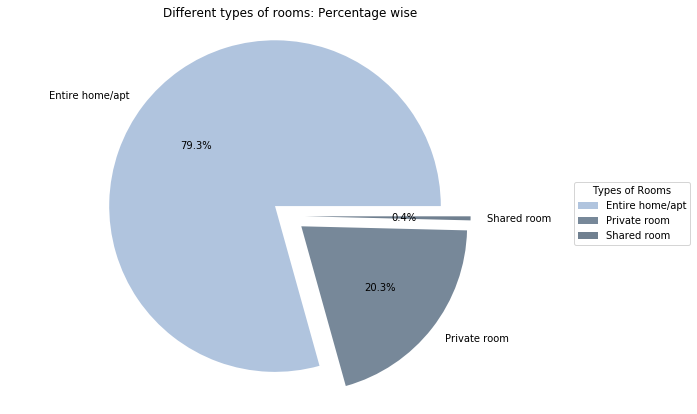

In [195]:
fig, ax = plt.subplots(figsize=(10,7))

# sns.countplot(x='room_type', data=df_listings, palette='deep', order=df_listings['room_type'].value_counts().index, ax=ax);
labels = ['Entire home/apt', 'Private room', 'Shared room']
explode = (0.1,0.1,0.1)

colors = ['#B0C4DE','#778899','#708090']

wedges, texts, autotexts = ax.pie(df_listings.room_type.value_counts(), labels=labels, autopct = '%1.1f%%', explode=explode, shadow=False, colors=colors);
ax.axis('equal');

ax.legend(wedges, labels,
          title="Types of Rooms",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title("Different types of rooms: Percentage wise")

plt.show()

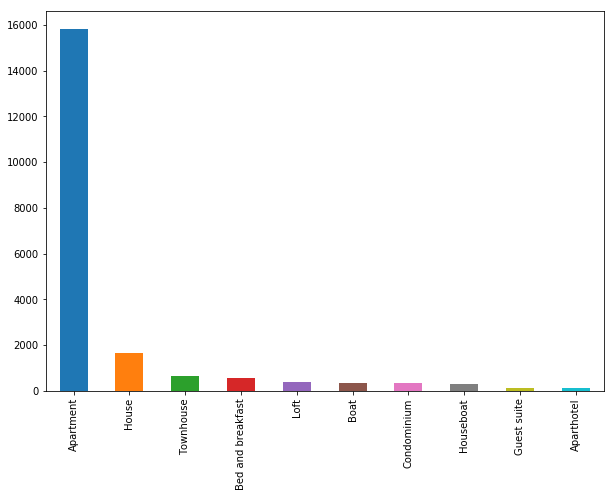

In [253]:
fig, ax = plt.subplots(figsize=(10,7))

df_listings.property_type.value_counts()[0:10].plot(kind='bar', ax=ax);

In [250]:
# df_listings['property_type'].value_counts()

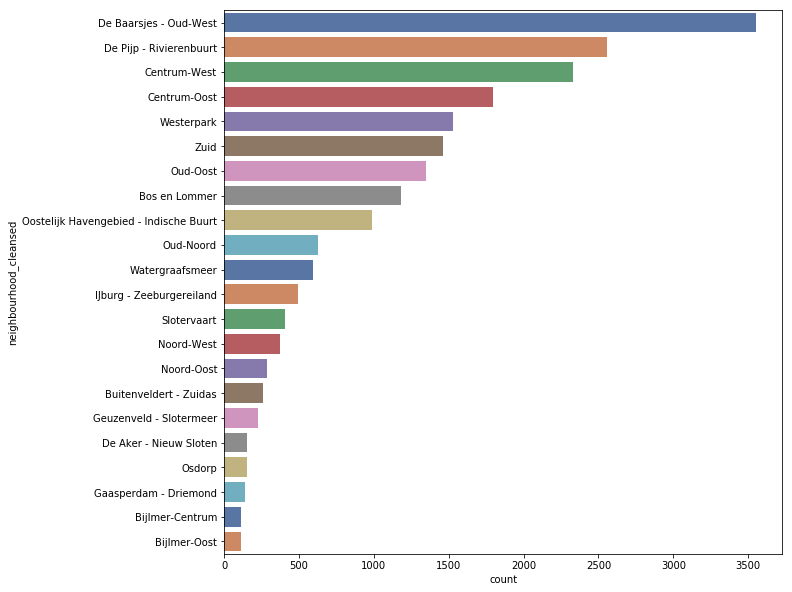

In [198]:
fig, ax = plt.subplots(figsize=(10,10))

sns.countplot(y='neighbourhood_cleansed', data=df_listings, palette='deep', order=df_listings['neighbourhood_cleansed'].value_counts().index, ax=ax);

In [199]:
# fig, ax = plt.subplots(figsize=(10,10))

# df_listings.neighbourhood_cleansed.value_counts(ascending=True).plot(kind='barh', ax=ax, zorder=2);

In [200]:
# df_listings.price.head()
df_listings.price = df_listings.price.str.replace(r'$','')
df_listings.price = df_listings.price.str.replace(r',','')

df_listings.price = pd.to_numeric(df_listings['price'])

In [201]:
# df_listings.neighbourhood_cleansed.nunique()
# df_listings.reset_index().groupby('neighbourhood_cleansed').price.mean()
pd.DataFrame(df_listings.groupby(['neighbourhood_cleansed'])['price','review_scores_rating'].mean())

,price,review_scores_rating
neighbourhood_cleansed,,
Bijlmer-Centrum,99.655172,93.011905
Bijlmer-Oost,92.008696,93.373737
Bos en Lommer,122.460169,95.253152
Buitenveldert - Zuidas,156.111538,93.873737
Centrum-Oost,203.086811,94.892053
Centrum-West,202.806271,94.220347
De Aker - Nieuw Sloten,134.097403,95.380165
De Baarsjes - Oud-West,148.131868,95.318850
De Pijp - Rivierenbuurt,162.860938,94.996853


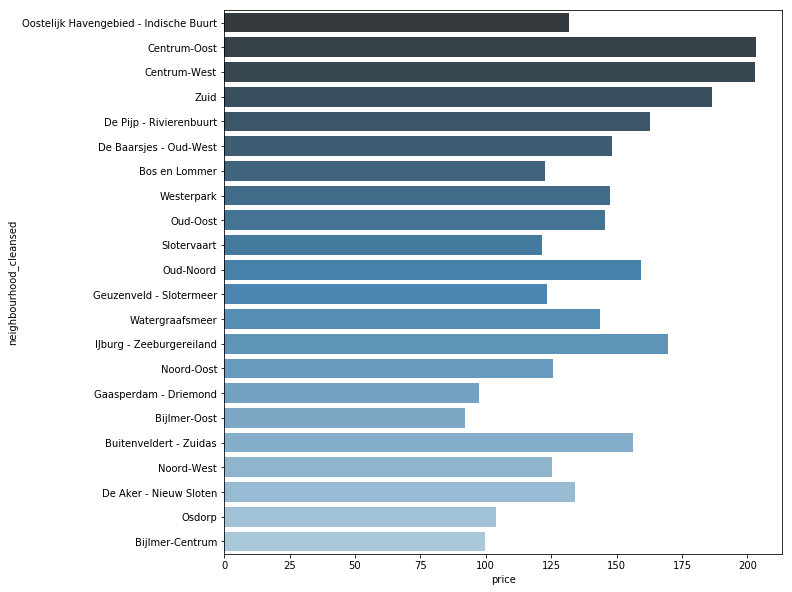

In [300]:
fig, ax = plt.subplots(figsize=(10,10))

sns.barplot(x='price', y='neighbourhood_cleansed', data=df_listings, palette='Blues_d', ax=ax, ci=None, orient='h');

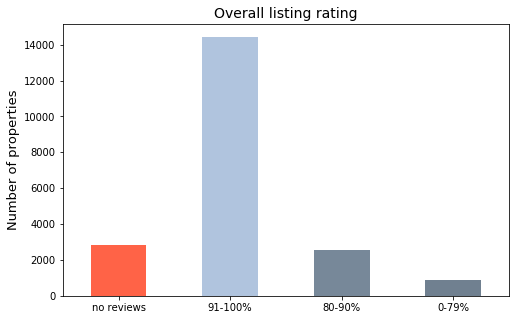

In [204]:
bins=[0, 80, 91, 100]
labels=['0-79', '80-90', '91-100']
df_listings_rating = pd.DataFrame()
df_listings_rating['review_scores_rating'] = pd.cut(df_listings['review_scores_rating'], bins=bins, labels=labels, include_lowest=True)
df_listings_rating['review_scores_rating'] = df_listings_rating['review_scores_rating'].astype('str')
df_listings_rating['review_scores_rating'].fillna('No Reviews', inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(8,5))
ax.set_title('Overall listing rating', fontsize=14)

df_listings_rating['review_scores_rating'].value_counts().sort_index(ascending=False).plot(kind='bar', color=['#FF6347', '#B0C4DE','#778899','#708090' ], ax=ax)
ax.set_xticklabels(labels=['No Reviews', '91-100%', '80-90%', '0-79%'], rotation=0)
ax.set_xlabel('')
ax.set_ylabel('Number of properties', fontsize=13)
plt.show()

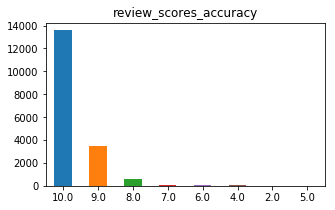

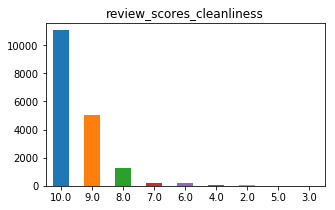

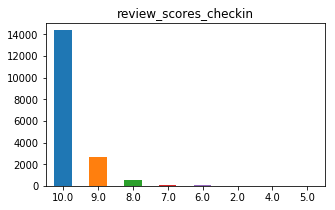

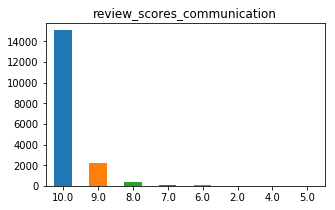

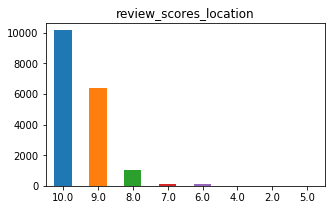

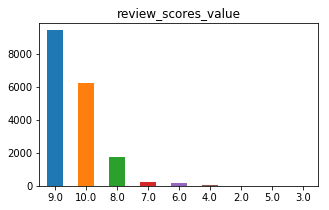

In [214]:
# df_listings.plot(kind='scatter', y='review_scores_rating')
for col in list(df_listings.columns[(df_listings.columns.str.startswith("review_scores") == True) & (df_listings.columns !='review_scores_rating')]):
    df_listings[col].value_counts().plot(kind='bar', figsize=(5,3))
    plt.title(col)
    plt.xticks(rotation=0)
    plt.show()

In [31]:
df_listings.price.describe()

count    20677.000000
mean       159.078686
std        162.464267
min          0.000000
25%         99.000000
50%        130.000000
75%        180.000000
max       8915.000000
Name: price, dtype: float64

In [32]:
# l_X, l_y = df_listings.drop('price', axis=1), df_listings['price'];
# l_X_train, l_X_test, l_y_train, l_y_test = train_test_split(l_X, l_y, test_size=0.33, random_state=1024);

# rf_classifier = RandomForestRegressor(n_estimators=400, criterion='mse', random_state=1024);
# rf_classifier.fit(l_X_train, l_y_train)

# l_y_pred = rf_classifier.predict(l_X_test);
# l_y_pred_tr = rf_classifier.predict(l_X_train);

# print(math.sqrt(mean_squared_error(l_y_test, l_y_pred)))
# print(math.sqrt(mean_squared_error(l_y_test, l_y_pred)))

In [33]:
# final_crs = {'init': 'epsg:28992'}
# NL = (
#     geopandas.read_file('./Netherlands_shapefile/nl_1km.shp')
#         .to_crs(final_crs)
# )

In [34]:
# NL.head()
# # fig, ax = plt.subplots(figsize=(10,20))

# # NL.plot(ax=ax)

In [320]:
df_map = df_listings[['latitude','longitude','host_name','host_is_superhost','price','availability_30','availability_60','availability_90','reviews_per_month','log_price']]

In [321]:
# df_listings.columns
df_map.head()

,latitude,longitude,host_name,host_is_superhost,price,availability_30,availability_60,availability_90,reviews_per_month,log_price
id,,,,,,,,,,
2818,52.36575,4.94142,Daniel,1.0,59.0,8,18,43,2.12,4.094345
20168,52.36509,4.89354,Alexander,0.0,80.0,0,8,34,2.46,4.394449
25428,52.37297,4.88339,Joan,0.0,125.0,4,6,16,0.16,4.836282
27886,52.38673,4.89208,Flip,1.0,150.0,6,13,26,2.11,5.017280
28871,52.36719,4.89092,Edwin,1.0,75.0,2,5,12,2.59,4.330733


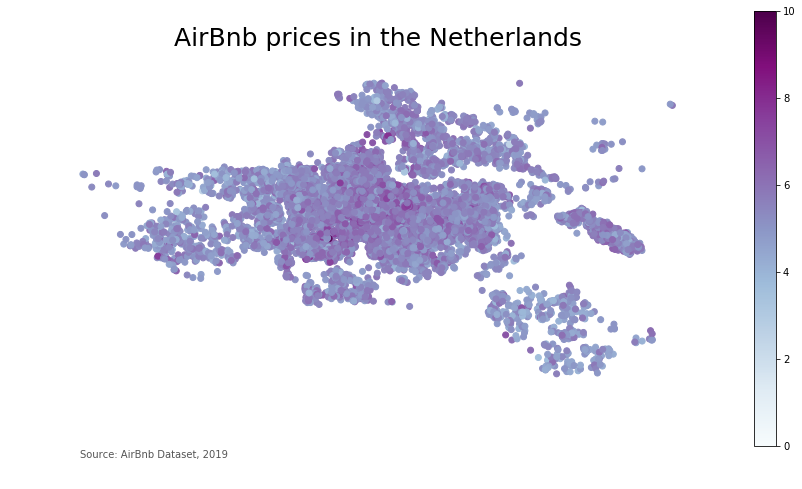

In [388]:
# df_merged_map = 
# NL.join(df_map)
geometry = [Point(xy) for xy in zip(df_map.longitude, df_map.latitude)]
# final_crs = {'init': 'epsg:28992'}

geodf = geopandas.GeoDataFrame(df_map, geometry=geometry)

fig, ax = plt.subplots(1, figsize=(15, 8))
variable = 'log_price'

ax.axis('off')
vmin=math.floor(geodf[variable].min())
vmax=math.ceil(geodf[variable].max())

sm=plt.cm.ScalarMappable(cmap='BuPu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])

fig.colorbar(sm)

# add a title
ax.set_title('AirBnb prices in the Netherlands', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: AirBnb Dataset, 2019',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555');

geodf.plot(variable, ax=ax, cmap='BuPu', linewidth=1);


In [390]:
# geodf[geodf.log_price>1]
math.ceil(geodf.log_price.max())

10

In [52]:
df_map.reviews_per_month.max()

33.67

In [488]:
df_numerical = df_listings.select_dtypes(include=['int64', 'float64','datetime64','int32']);
for col in df_numerical:
    df_numerical[col] = df_numerical[col].fillna(df_numerical[col].mode()[0])

In [468]:
# df_categorical.info()

In [489]:
df_categorical = df_listings.select_dtypes(exclude=['int64', 'float64','datetime64','int32'],)


In [490]:
array_attributes = ['amenities', 'jurisdiction_names']

def clean_cat_columns(col):
    col=col.str.replace('[','')
    col=col.str.replace(']','')
    col=col.str.replace('{','')
    col=col.str.replace('}','')
    col=col.str.replace("'",'')
    col=col.str.replace('"','')
    col=col.str.replace('$','')
    col=col.str.replace('%','')

    return col
df_categorical = df_categorical[df_categorical.columns].apply(lambda col: clean_cat_columns(col));


for col in df_categorical:
    df_categorical[col] = df_categorical[col].fillna(df_categorical[col].mode()[0])

In [491]:
drop_cols = ['experiences_offered','host_name','street','neighbourhood','city','state','zipcode','market','smart_location','country','country_code','amenities','weekly_price','monthly_price','security_deposit','calendar_updated','first_review','last_review','license','jurisdiction_names','calendar_last_scraped']
categorical_cols = ['host_response_time','neighbourhood_cleansed','property_type','room_type','bed_type','cancellation_policy']
num_cols = ['host_response_rate','cleaning_fee','extra_people']

df_categorical = df_categorical.drop(columns=drop_cols, axis=1)

for col in categorical_cols:
    df_categorical[col] = df_categorical[col].astype('category')
    
for col in num_cols:
    df_categorical[col] = df_categorical[col].astype('float')

In [492]:
# df_categorical.isnull().sum()
df_listings_cleaned = pd.concat([df_numerical, df_categorical], axis=1)

In [493]:
df_listings_cleaned.head()

,host_since,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,square_feet,price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_year,log_price,host_response_time,host_response_rate,neighbourhood_cleansed,property_type,room_type,bed_type,cleaning_fee,extra_people,cancellation_policy
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2818,2008-09-24,1.0,1.0,1.0,0.0,52.36575,4.94142,0,2,1.5,1.0,2.0,0.0,59.0,1,3,15,8,18,43,89,267,30,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1,0,1,0,2.12,2008,4.094345,within an hour,100.0,Oostelijk Havengebied - Indische Buurt,Apartment,Private room,Real Bed,60.0,20.0,strict_14_with_grace_period
20168,2009-12-02,0.0,2.0,2.0,0.0,52.36509,4.89354,1,2,1.0,1.0,1.0,0.0,80.0,2,1,1000,0,8,34,124,283,67,88.0,9.0,10.0,10.0,10.0,10.0,9.0,0,2,0,2,0,2.46,2009,4.394449,within an hour,100.0,Centrum-Oost,Townhouse,Private room,Real Bed,50.0,0.0,strict_14_with_grace_period
25428,2009-11-20,0.0,2.0,2.0,0.0,52.37297,4.88339,0,3,1.0,1.0,1.0,0.0,125.0,2,14,60,4,6,16,75,3,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,2,2,0,0,0.16,2009,4.836282,within an hour,100.0,Centrum-West,Apartment,Entire home/apt,Real Bed,40.0,10.0,strict_14_with_grace_period
27886,2010-03-23,1.0,1.0,1.0,1.0,52.38673,4.89208,1,2,1.0,1.0,1.0,0.0,150.0,1,2,730,6,13,26,66,195,41,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1,0,1,0,2.11,2010,5.017280,within an hour,100.0,Centrum-West,Houseboat,Private room,Real Bed,0.0,0.0,strict_14_with_grace_period
28871,2010-05-13,1.0,3.0,3.0,1.0,52.36719,4.89092,1,2,1.0,1.0,1.0,0.0,75.0,1,2,1825,2,5,12,138,283,99,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,3,0,3,0,2.59,2010,4.330733,within an hour,100.0,Centrum-West,Apartment,Private room,Real Bed,50.0,0.0,moderate


In [494]:
df_listings_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20677 entries, 2818 to 37590988
Data columns (total 47 columns):
host_since                                      20677 non-null datetime64[ns]
host_is_superhost                               20677 non-null float64
host_listings_count                             20677 non-null float64
host_total_listings_count                       20677 non-null float64
host_identity_verified                          20677 non-null float64
latitude                                        20677 non-null float64
longitude                                       20677 non-null float64
is_location_exact                               20677 non-null int64
accommodates                                    20677 non-null int64
bathrooms                                       20677 non-null float64
bedrooms                                        20677 non-null float64
beds                                            20677 non-null float64
square_feet                   

In [495]:
hrt_dummy = pd.get_dummies(df_listings_cleaned['host_response_time'])
nc_dummy = pd.get_dummies(df_listings_cleaned['neighbourhood_cleansed'])
pt_dummy = pd.get_dummies(df_listings_cleaned['property_type'])
rt_dummy = pd.get_dummies(df_listings_cleaned['room_type'])
bt_dummy = pd.get_dummies(df_listings_cleaned['bed_type'])
cp_dummy = pd.get_dummies(df_listings_cleaned['cancellation_policy'])

drop_cols = ['host_response_time','neighbourhood_cleansed','property_type','room_type','bed_type','cancellation_policy']
df_listings_cleaned = df_listings_cleaned.drop(columns=drop_cols, axis=1)

df_listings_cleaned = pd.concat([df_listings_cleaned,hrt_dummy,pt_dummy,rt_dummy,bt_dummy,cp_dummy], axis=1)

In [466]:
df_categorical.calendar_last_scraped.value_counts()

2019-08-09    13224
2019-08-08     7452
2019-09-03        1
Name: calendar_last_scraped, dtype: int64

In [512]:
# df_categorical.info()
l_X.head()

,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_year,log_price,host_response_rate,cleaning_fee,extra_people,a few days or more,within a day,within a few hours,within an hour,Aparthotel,Apartment,Barn,Bed and breakfast,Boat,Boutique hotel,Bungalow,Cabin,Camper/RV,Campsite,Casa particular (Cuba),Castle,Chalet,Condominium,Cottage,Dome house,Earth house,Guest suite,Guesthouse,Hostel,Hotel,House,Houseboat,Hut,Island,Lighthouse,Loft,Nature lodge,Other,Serviced apartment,Tent,Tiny house,Townhouse,Villa,Yurt,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,flexible,moderate,strict_14_with_grace_period,super_strict_30,super_strict_60
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2818,1.0,1.0,1.0,0.0,52.36575,4.94142,0,2,1.5,1.0,2.0,0.0,1,3,15,8,18,43,89,267,30,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1,0,1,0,2.12,2008,4.094345,100.0,60.0,20.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
20168,0.0,2.0,2.0,0.0,52.36509,4.89354,1,2,1.0,1.0,1.0,0.0,2,1,1000,0,8,34,124,283,67,88.0,9.0,10.0,10.0,10.0,10.0,9.0,0,2,0,2,0,2.46,2009,4.394449,100.0,50.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
25428,0.0,2.0,2.0,0.0,52.37297,4.88339,0,3,1.0,1.0,1.0,0.0,2,14,60,4,6,16,75,3,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,2,2,0,0,0.16,2009,4.836282,100.0,40.0,10.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
27886,1.0,1.0,1.0,1.0,52.38673,4.89208,1,2,1.0,1.0,1.0,0.0,1,2,730,6,13,26,66,195,41,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1,0,1,0,2.11,2010,5.017280,100.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
28871,1.0,3.0,3.0,1.0,52.36719,4.89092,1,2,1.0,1.0,1.0,0.0,1,2,1825,2,5,12,138,283,99,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,3,0,3,0,2.59,2010,4.330733,100.0,50.0,0.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0


In [507]:
df_listings_cleaned = df_listings_cleaned.drop(['host_since'], axis=1)
l_X, l_y = df_listings_cleaned.drop('price', axis=1), df_listings_cleaned['price'];
l_X_train, l_X_test, l_y_train, l_y_test = train_test_split(l_X, l_y, test_size=0.25, random_state=1024);

rf_classifier = RandomForestRegressor(n_estimators=100, max_depth=20, criterion='mse', random_state=1024);
rf_classifier.fit(l_X_train, l_y_train)

l_y_pred = rf_classifier.predict(l_X_test);
l_y_pred_tr = rf_classifier.predict(l_X_train);

In [508]:
print(math.sqrt(mean_squared_error(l_y_train, l_y_pred_tr)))
print(math.sqrt(mean_squared_error(l_y_test, l_y_pred)))

11.590783192984075
10.724520111630083


In [517]:
pca = PCA(n_components=75, random_state=1024);
pca.fit(l_X)

l_X, l_y = df_listings_cleaned.drop('price', axis=1), df_listings_cleaned['price'];

listings_pca = pca.transform(l_X);
l_X_p_train, l_X_p_test, l_y_p_train, l_y_p_test = train_test_split(listings_pca, l_y, test_size=0.25, random_state=1024)    

rf_classifier_2 = RandomForestRegressor(n_estimators=100, max_depth=40, criterion='mse', random_state=1024);
rf_classifier_2.fit(l_X_p_train, l_y_p_train)

l_y_p_pred = rf_classifier_2.predict(l_X_p_test);
l_y_p_pred_tr = rf_classifier_2.predict(l_X_p_train);

In [518]:
print(math.sqrt(mean_squared_error(l_y_p_train, l_y_p_pred_tr)))
print(math.sqrt(mean_squared_error(l_y_p_test, l_y_p_pred)))

40.022807240859095
62.47694308242493


In [255]:
pca.score_samples

<bound method PCA.score_samples of PCA(copy=True, iterated_power='auto', n_components=30, random_state=1024,
  svd_solver='auto', tol=0.0, whiten=False)>

In [519]:
pca.explained_variance_ratio_[0:10]

array([0.90609631, 0.03612167, 0.03204351, 0.01116563, 0.00703856,
       0.00168228, 0.00160506, 0.00122511, 0.00108371, 0.00097311])

In [520]:
# xgb_reg = xgboost.XGBRegressor()

# xgb_reg.fit(l_X_train, l_y_train)
# xgb_reg = xgb.predict(l_X_train)
# xgb_reg_pred = xgb_reg.predict(l_X_test)
# xgb_reg_pred_tr = xgb_reg.predict(l_X_p_train)

# print(math.sqrt(mean_squared_error(l_y_p_train, l_y_p_pred_tr)))
# print(math.sqrt(mean_squared_error(l_y_p_test, l_y_p_pred)))

In [521]:
linear_reg = linear_model.LinearRegression()

l_X_train, l_X_test, l_y_train, l_y_test = train_test_split(l_X, l_y, test_size=0.25, random_state=1024);

linear_reg.fit(l_X_train, l_y_train)
l_y_pred = linear_reg.predict(l_X_test)
l_y_pred_tr = linear_reg.predict(l_X_train)

# l_y_p_pred = math.sqrt(mean_squared_error(l_y_p_test, l_y_pred))
# l_y_p_pred_tr = math.sqrt(mean_squared_error(l_y_p_test, l_y_pred_tr))

print("Training RMSE for Linear Regression Model ",math.sqrt(mean_squared_error(l_y_train, l_y_pred_tr)))
print("Testing RMSE for Linear Regression Model ",math.sqrt(mean_squared_error(l_y_test, l_y_pred)))

Training RMSE for Linear Regression Model  123.9820616928578
Testing RMSE for Linear Regression Model  80.54371183847883


In [523]:
pca = PCA(n_components=75, random_state=1024);
pca.fit(l_X)

listings_pca = pca.transform(l_X);
l_X_p_train, l_X_p_test, l_y_p_train, l_y_p_test = train_test_split(listings_pca, l_y, test_size=0.25, random_state=1024)    

linear_reg = linear_model.LinearRegression()

linear_reg.fit(l_X_p_train, l_y_p_train)
l_y_p_pred = linear_reg.predict(l_X_p_test)
l_y_p_pred_tr = linear_reg.predict(l_X_p_train)

# l_y_p_pred = math.sqrt(mean_squared_error(l_y_p_test, l_y_pred))
# l_y_p_pred_tr = math.sqrt(mean_squared_error(l_y_p_test, l_y_pred_tr))

print("Training RMSE for Linear Regression Model with PCA",math.sqrt(mean_squared_error(l_y_p_train, l_y_p_pred_tr)))
print("Testing RMSE for Linear Regression Model with PCA",math.sqrt(mean_squared_error(l_y_p_test, l_y_p_pred)))

Training RMSE for Linear Regression Model with PCA 126.73384777673478
Testing RMSE for Linear Regression Model with PCA 241.06148503956555


In [524]:
# After log price
linear_reg = linear_model.LinearRegression()
l_X, l_y = df_listings_cleaned.drop('log_price', axis=1), df_listings_cleaned['log_price'];

l_X_train, l_X_test, l_y_train, l_y_test = train_test_split(l_X, l_y, test_size=0.25, random_state=1024);

linear_reg.fit(l_X_train, l_y_train)
l_y_pred = linear_reg.predict(l_X_test)
l_y_pred_tr = linear_reg.predict(l_X_train)

# l_y_p_pred = math.sqrt(mean_squared_error(l_y_p_test, l_y_pred))
# l_y_p_pred_tr = math.sqrt(mean_squared_error(l_y_p_test, l_y_pred_tr))

print("Training RMSE for Linear Regression Model ",math.sqrt(mean_squared_error(l_y_train, l_y_pred_tr)))
print("Testing RMSE for Linear Regression Model ",math.sqrt(mean_squared_error(l_y_test, l_y_pred)))

Training RMSE for Linear Regression Model  0.301137589967117
Testing RMSE for Linear Regression Model  42.530105717619705


In [525]:
pca = PCA(n_components=10, random_state=1024);
pca.fit(l_X)

listings_pca = pca.transform(l_X);
l_X_p_train, l_X_p_test, l_y_p_train, l_y_p_test = train_test_split(listings_pca, l_y, test_size=0.25, random_state=1024)    

linear_reg = linear_model.LinearRegression()

linear_reg.fit(l_X_p_train, l_y_p_train)
l_y_p_pred = linear_reg.predict(l_X_p_test)
l_y_p_pred_tr = linear_reg.predict(l_X_p_train)

# l_y_p_pred = math.sqrt(mean_squared_error(l_y_p_test, l_y_pred))
# l_y_p_pred_tr = math.sqrt(mean_squared_error(l_y_p_test, l_y_pred_tr))

print("Training RMSE for Linear Regression Model with PCA",math.sqrt(mean_squared_error(l_y_p_train, l_y_p_pred_tr)))
print("Testing RMSE for Linear Regression Model with PCA",math.sqrt(mean_squared_error(l_y_p_test, l_y_p_pred)))

Training RMSE for Linear Regression Model with PCA 0.3725971711491725
Testing RMSE for Linear Regression Model with PCA 0.3382295754697028


In [527]:
# After Log Price
# df_listings_cleaned = df_listings_cleaned.drop(['amenities','jurisdiction_names'], axis=1)
l_X_train, l_X_test, l_y_train, l_y_test = train_test_split(l_X, l_y, test_size=0.25, random_state=1024);

rf_classifier = RandomForestRegressor(n_estimators=100, max_depth=20, criterion='mse', random_state=1024);
rf_classifier.fit(l_X_train, l_y_train)

l_y_pred = rf_classifier.predict(l_X_test);
l_y_pred_tr = rf_classifier.predict(l_X_train)

print(math.sqrt(mean_squared_error(l_y_train, l_y_pred_tr)))
print(math.sqrt(mean_squared_error(l_y_test, l_y_pred)))

0.007857067586903107
0.007403230370536173


In [528]:
pca = PCA(n_components=30, random_state=1024);
pca.fit(l_X)

listings_pca = pca.transform(l_X);
l_X_p_train, l_X_p_test, l_y_p_train, l_y_p_test = train_test_split(listings_pca, l_y, test_size=0.25, random_state=1024)    

rf_classifier_2 = RandomForestRegressor(n_estimators=100, max_depth=40, criterion='mse', random_state=1024);
rf_classifier_2.fit(l_X_p_train, l_y_p_train)

l_y_p_pred = rf_classifier_2.predict(l_X_p_test);
l_y_p_pred_tr = rf_classifier_2.predict(l_X_p_train)

print(math.sqrt(mean_squared_error(l_y_p_train, l_y_p_pred_tr)))
print(math.sqrt(mean_squared_error(l_y_p_test, l_y_p_pred)))

0.013223900192647764
0.02407832758477489


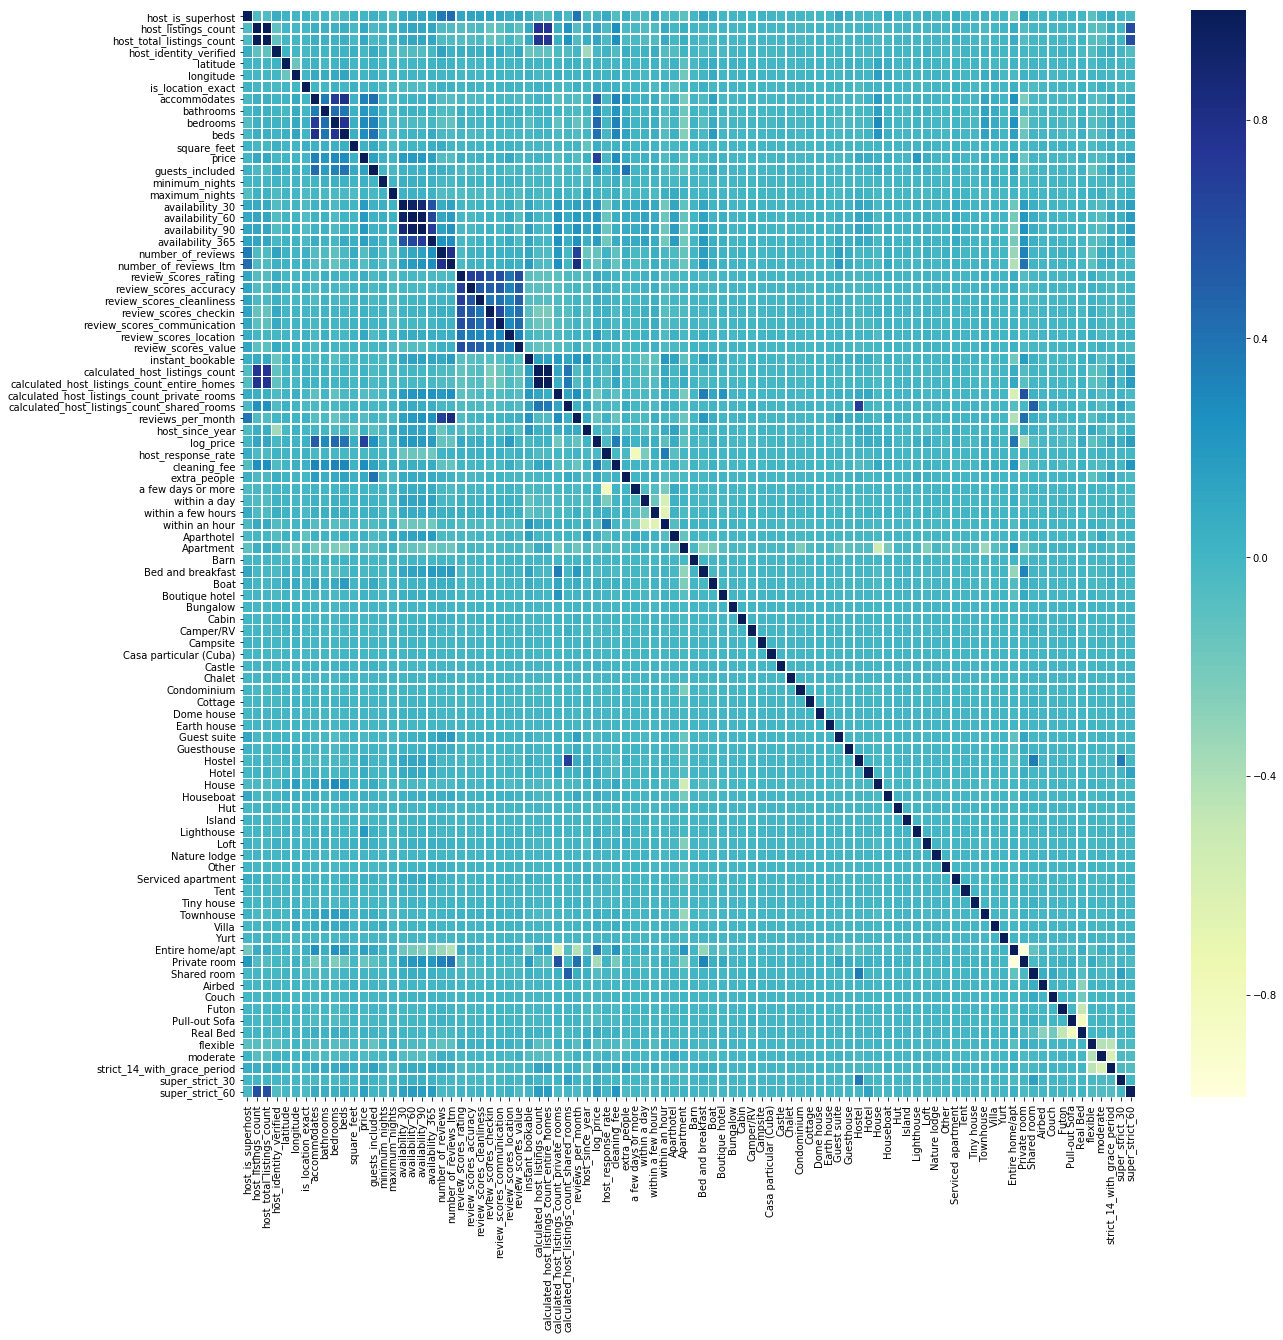

In [532]:
# sns.pairplot(df_listings)
corr = df_listings_cleaned.corr()
fig, ax = plt.subplots(figsize=(20,20))

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, 
        linewidths=.5,
        cmap="YlGnBu",
        ax=ax)